In [96]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [69]:
df = pd.read_csv("../data/clean_data.csv")
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,...,performance,high-performance,crossover,hybrid,luxury,flex_fuel,factory_tuner,hatchback,diesel,exotic
0,other,other,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,1,1,0,0,1,0,1,0,0,0
1,other,other,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,1,0,0,0,1,0,0,0,0,0
2,other,other,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,1,1,0,0,1,0,0,0,0,0
3,other,other,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,1,0,0,0,1,0,0,0,0,0
4,other,other,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,1,0,0,0,0,0


In [70]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'vehicle_size', 'vehicle_style', 'highway_mpg',
       'city_mpg', 'popularity', 'msrp', 'performance', 'high-performance',
       'crossover', 'hybrid', 'luxury', 'flex_fuel', 'factory_tuner',
       'hatchback', 'diesel', 'exotic'],
      dtype='object')

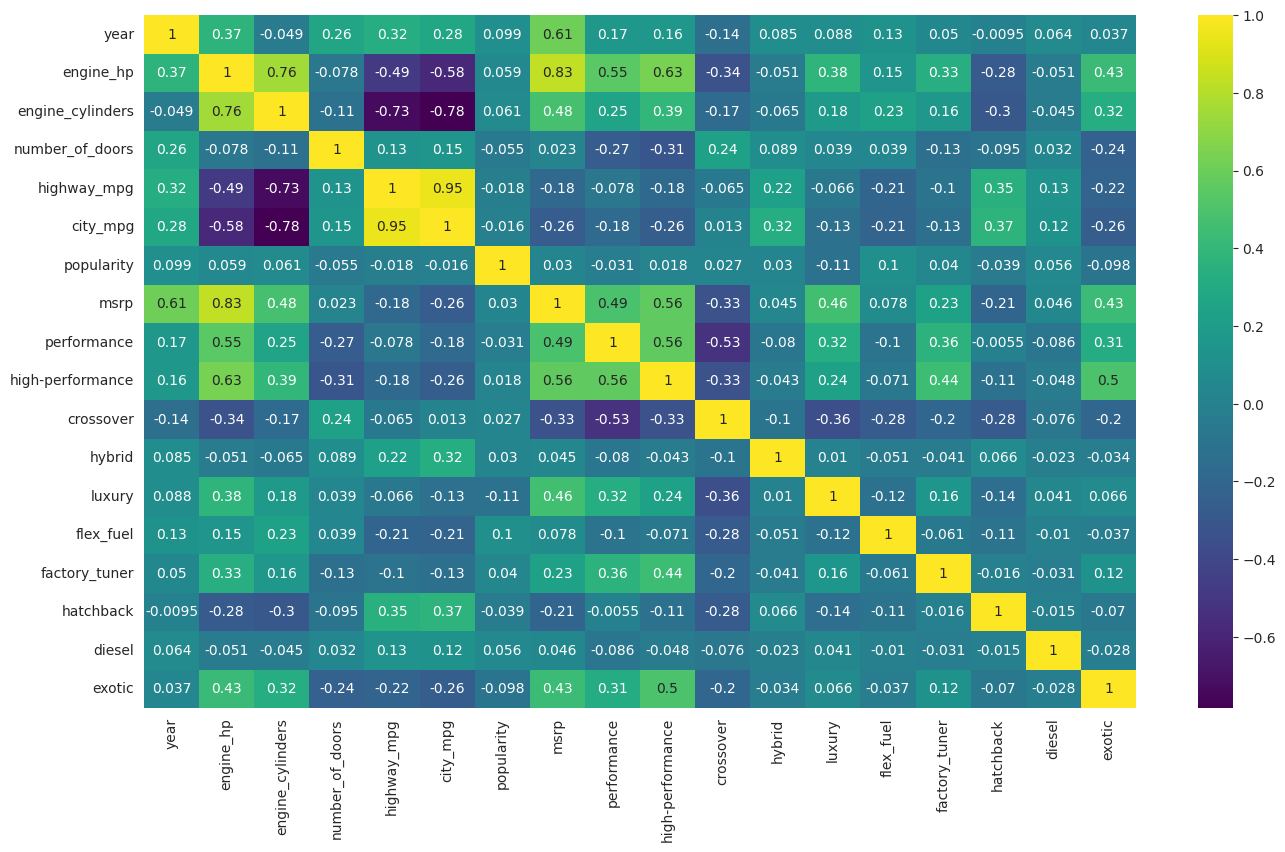

In [71]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="viridis")
plt.show()

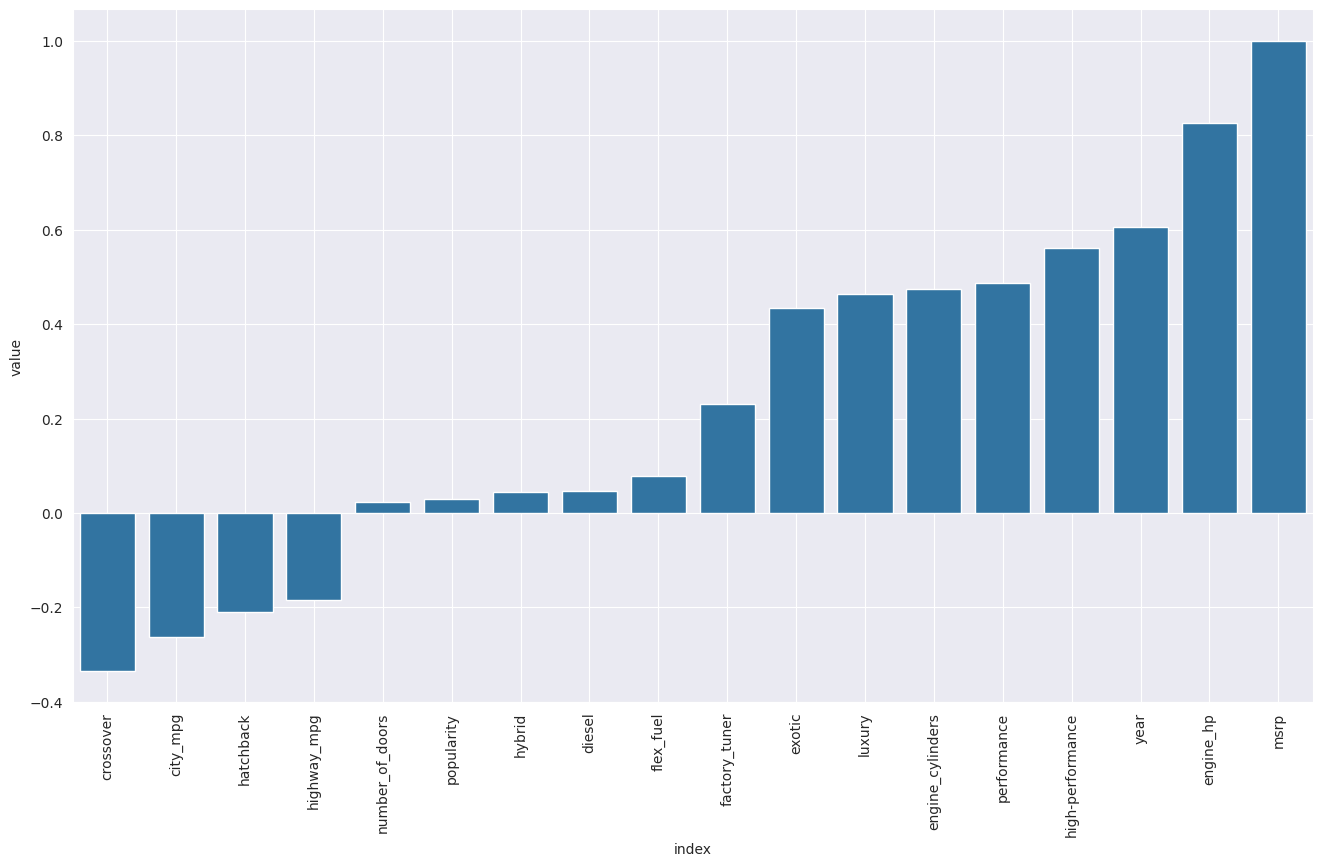

In [72]:
sns.set_style("dark")
cor = df.corrwith(df["msrp"],numeric_only=True).sort_values().reset_index()
cor.columns = ["index","value"]
plt.figure(figsize=(16,9))
sns.barplot(data=cor,x="index",y="value")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# split data

In [73]:
x = df.drop(columns="msrp")
y = df["msrp"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=42)


# encoding

In [74]:
cat_col = df.select_dtypes("object").columns.tolist()
oe  = OrdinalEncoder()
oe.fit(x_train[cat_col])
x_train[cat_col] = oe.transform(x_train[cat_col])
x_test[cat_col] = oe.transform(x_test[cat_col])


# scaling

In [75]:
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

# modeling

In [76]:
models = {
    "linear":LinearRegression(),
    "ridge" : Ridge(random_state=42),
    "lasso":Lasso(random_state=42),
    "elasticnet":ElasticNet(random_state=42),
    "knn":KNeighborsRegressor(),
    "svr":SVR(),
    "tree":DecisionTreeRegressor(random_state=42),
    "forest" :RandomForestRegressor(random_state=42)
}

In [79]:
def check_models(models):
    for name,c_model in models.items():
        model = c_model
        model.fit(x_train,y_train)
        print(F"model : {name}")
        print(f"Traing score :{model.score(x_train,y_train)}")
        print(f"Testing score :{model.score(x_test,y_test)}")
        print("....................")
#check_models(models)

# model tunning

In [81]:
forest = RandomForestRegressor()

params = [
    {
       "criterion":["squared_error","absolute_error"],
         "max_depth":[None,10,20,30],
            "min_samples_split":[2,5,10],
            "min_samples_leaf":[1,2,4],
            "max_features":["auto","sqrt"],
            "n_estimators":[10,50,100], 
    }
]

grid_search = GridSearchCV(forest,params,scoring="r2",cv=5,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)
grid_search.best_params_,grid_search.best_score_

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END criterion=squared_error, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, max_featur

/home/ravi/car_price_prediction_system/.car/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
797 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ravi/car_price_prediction_system/.car/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ravi/car_price_prediction_system/.car/lib/python3.11/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/ravi/car_price_prediction_system/.car/lib/python3.11/site-packages/sklearn/ba

({'criterion': 'squared_error',
  'max_depth': None,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 100},
 np.float64(0.9717765033695189))

In [86]:
final_model = RandomForestRegressor(**grid_search.best_params_)
final_model.fit(x_train,y_train)
final_model.score(x_train,y_train),final_model.score(x_test,y_test)

(0.9872440773740527, 0.9750740434312594)

In [108]:
grid_search. best_params_

{'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [97]:
y_pred = final_model.predict(x_test)
r2_score(y_test,y_pred)

0.9750740434312594

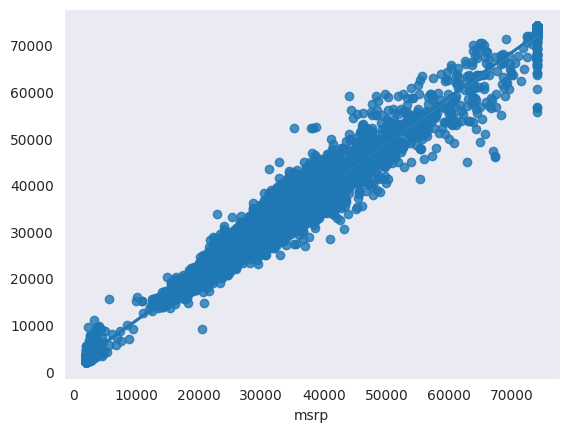

In [101]:
sns.regplot(x=y_test,y=y_pred)
plt.show()